In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rcParams['font.family'] = 'Moneygraphy Rounded' # SejongGeulggot, Moneygraphy Rounded
plt.rcParams['axes.unicode_minus'] = False

## [절대값]

### 1-1 대게_가락 ~ KOSPI 

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 150일 | 0.4225 | 6.5997e-69 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.359216  1.895412e-53
1          2  0.361242  4.801236e-54
2          3  0.363346  1.139183e-54
3          4  0.365644  2.325114e-55
4          5  0.367679  5.685248e-56
..       ...       ...           ...
594      595 -0.237749  6.779446e-16
595      596 -0.238522  5.594039e-16
596      597 -0.239326  4.572390e-16
597      598 -0.238312  6.304895e-16
598      599 -0.237839  7.434906e-16

[599 rows x 3 columns]


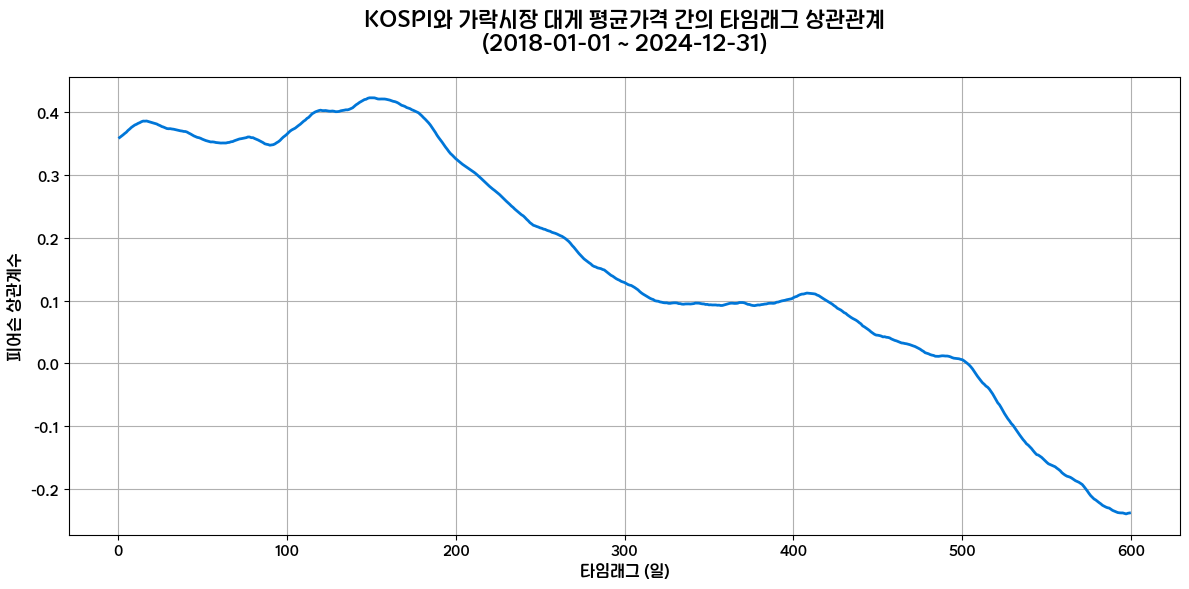

KOSPI와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 150일 입니다.
최대 피어슨 상관계수: 0.4225
P-값: 6.5997e-69


In [20]:
# 경제지표 데이터 로드
df_kospi = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])


# 날짜 범위 지정 
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_kospi, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kospi_lagged = df_merged['KOSPI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kospi_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )

# 타이틀 크기 변경
plt.title(f'KOSPI와 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )

plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('kospi_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'KOSPI와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-2 대게_가락 ~ USD/KRW

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 94일 | 0.2685 |  3.2980e-28 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.194740  3.901502e-16
1          2  0.193495  6.157722e-16
2          3  0.192163  9.981657e-16
3          4  0.191092  1.473415e-15
4          5  0.189917  2.247497e-15
..       ...       ...           ...
194      195  0.022647  3.771262e-01
195      196  0.022754  3.750248e-01
196      197  0.022914  3.718474e-01
197      198  0.022933  3.716013e-01
198      199  0.022316  3.847599e-01

[199 rows x 3 columns]


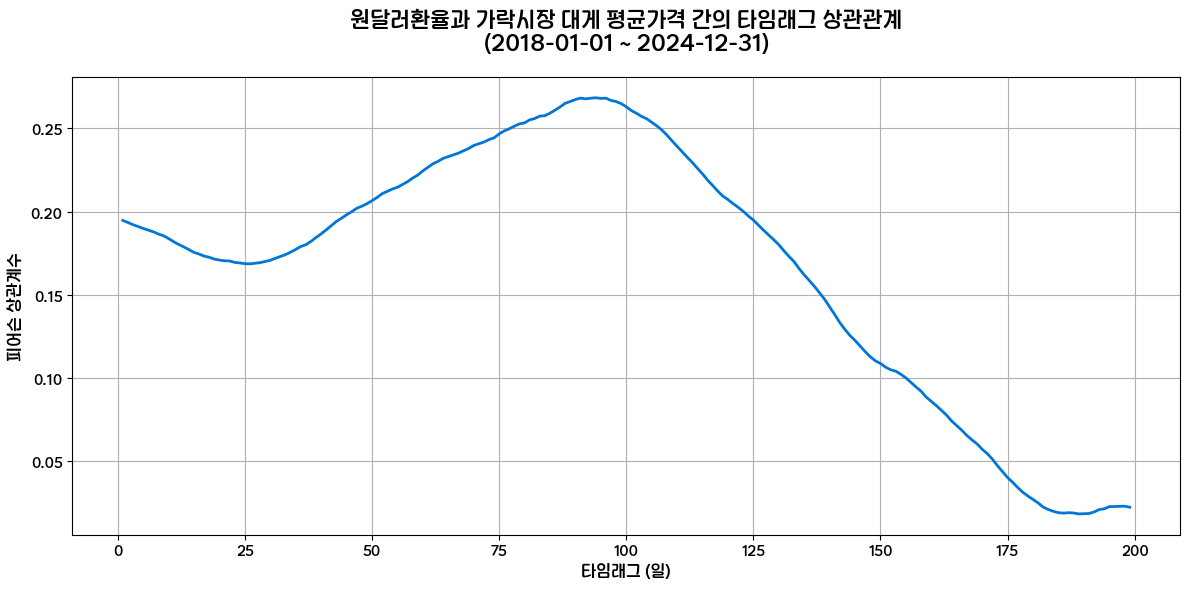

원달러 환율과 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 94일 입니다.
최대 피어슨 상관계수: 0.2685
P-값: 3.2980e-28


In [25]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 200)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    usdkrw_lagged = df_merged['USD/KRW'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        usdkrw_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'원달러환율과 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('usdkrw_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'원달러 환율과 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-3 대게_가락 ~ VIX

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 225일 |  0.3604  |  5.1372e-47 |


     타임래그(일)  피어슨 상관계수       P-값
0          1  0.059230  0.014101
1          2  0.055439  0.021641
2          3  0.049667  0.039726
3          4  0.044187  0.067412
4          5  0.038423  0.111906
..       ...       ...       ...
594      595 -0.018160  0.543220
595      596 -0.017263  0.563514
596      597 -0.015464  0.605016
597      598 -0.014150  0.636174
598      599 -0.013237  0.658257

[599 rows x 3 columns]


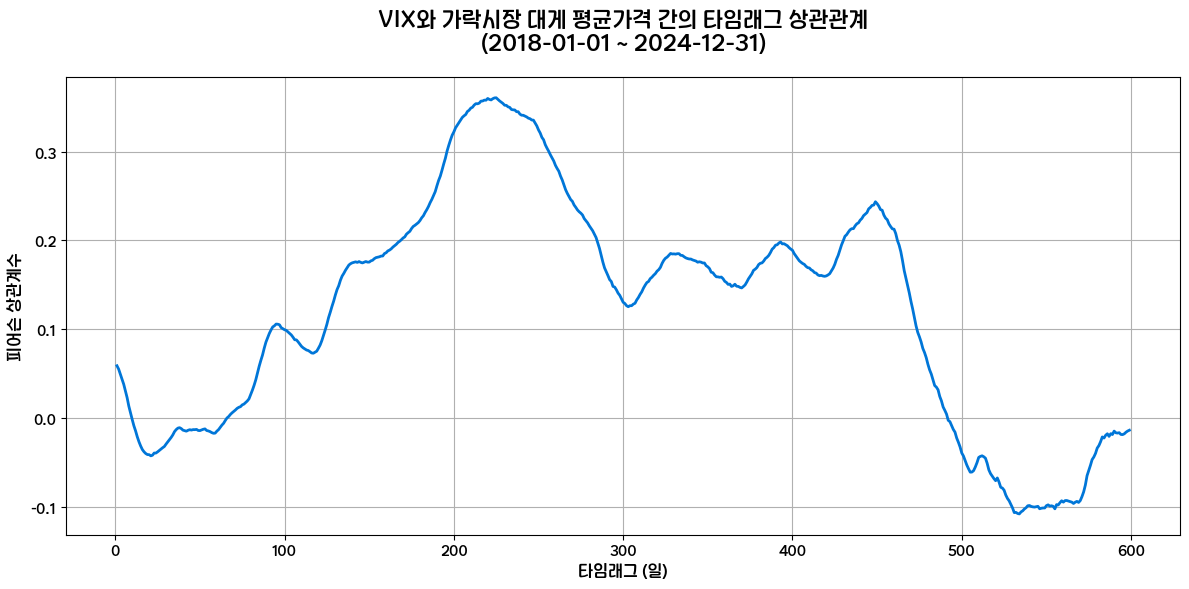

VIX와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 225일 입니다.
최대 피어슨 상관계수: 0.3604
P-값: 5.1372e-47


In [24]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    vix_lagged = df_merged['VIX'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        vix_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'VIX와 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('vix_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'VIX와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-4 대게_가락 ~ WTI

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 |  0.2775  | 9.9976e-32 |


     타임래그(일)  피어슨 상관계수           P-값
0          1  0.277485  9.997626e-32
1          2  0.274744  4.279135e-31
2          3  0.272559  1.357583e-30
3          4  0.270458  4.082317e-30
4          5  0.268478  1.143742e-29
..       ...       ...           ...
594      595 -0.234077  1.924765e-15
595      596 -0.229733  6.645216e-15
596      597 -0.225178  2.365215e-14
597      598 -0.222218  5.362352e-14
598      599 -0.218773  1.362653e-13

[599 rows x 3 columns]


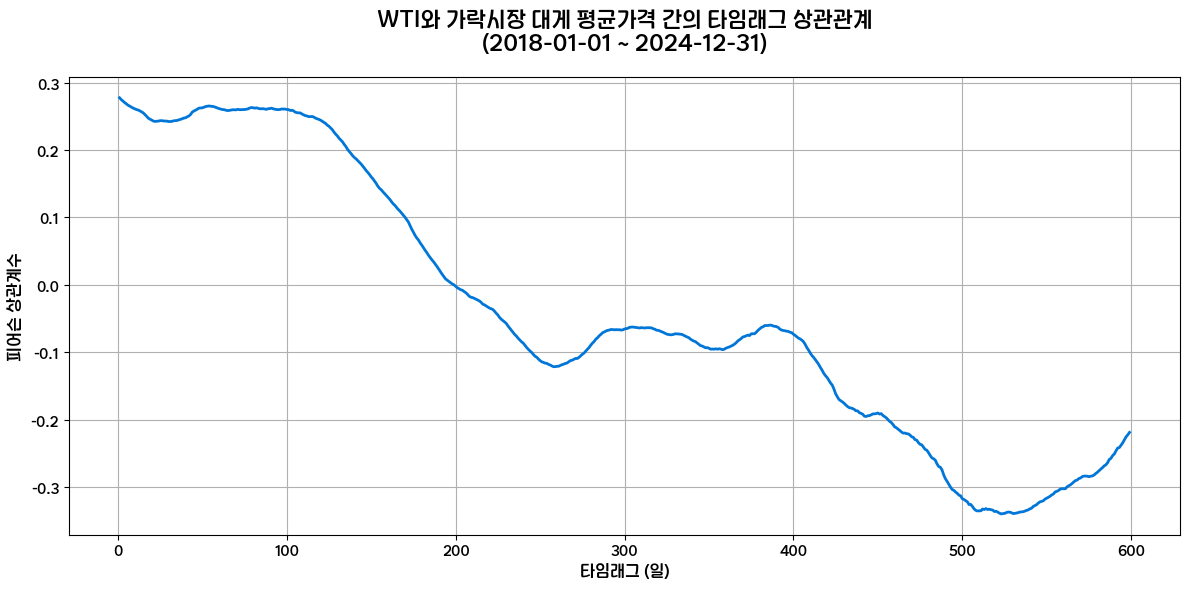

WTI와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.2775
P-값: 9.9976e-32


In [14]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]
# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    wti_lagged = df_merged['WTI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        wti_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'WTI와 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('wti_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'WTI와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-5 대게_가락 ~ Gold

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 174일 | 0.4204  | 3.5629e-67 |


     타임래그(일)  피어슨 상관계수           P-값
0          1  0.247282  2.452301e-25
1          2  0.248047  1.786111e-25
2          3  0.248993  1.196310e-25
3          4  0.249741  8.764631e-26
4          5  0.250609  6.069783e-26
..       ...       ...           ...
594      595 -0.030665  3.045535e-01
595      596 -0.033383  2.638844e-01
596      597 -0.036114  2.269757e-01
597      598 -0.038017  2.036074e-01
598      599 -0.040105  1.800496e-01

[599 rows x 3 columns]


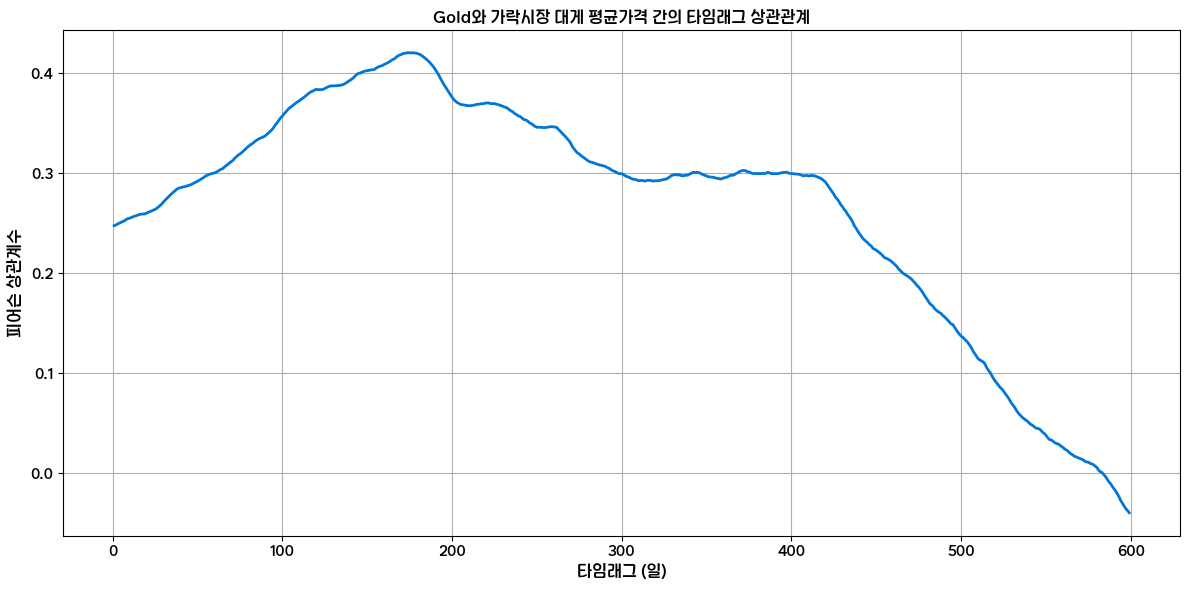

Gold와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 174일 입니다.
최대 피어슨 상관계수: 0.4204
P-값: 3.5629e-67


In [22]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    gold_lagged = df_merged['Gold'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        gold_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'Gold와 가락시장 대게 평균가격 간의 타임래그 상관관계')
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('gold_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'Gold와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-6 대게_가락 ~ Silver

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 120일 | 0.4696  | 1.9837e-8 |



     타임래그(일)  피어슨 상관계수           P-값
0          1  0.282230  8.305144e-33
1          2  0.284660  2.379496e-33
2          3  0.286613  8.713087e-34
3          4  0.288547  3.200736e-34
4          5  0.290550  1.123892e-34
..       ...       ...           ...
594      595 -0.105823  3.819008e-04
595      596 -0.108742  2.630463e-04
596      597 -0.110975  1.969161e-04
597      598 -0.112119  1.699949e-04
598      599 -0.113923  1.339560e-04

[599 rows x 3 columns]


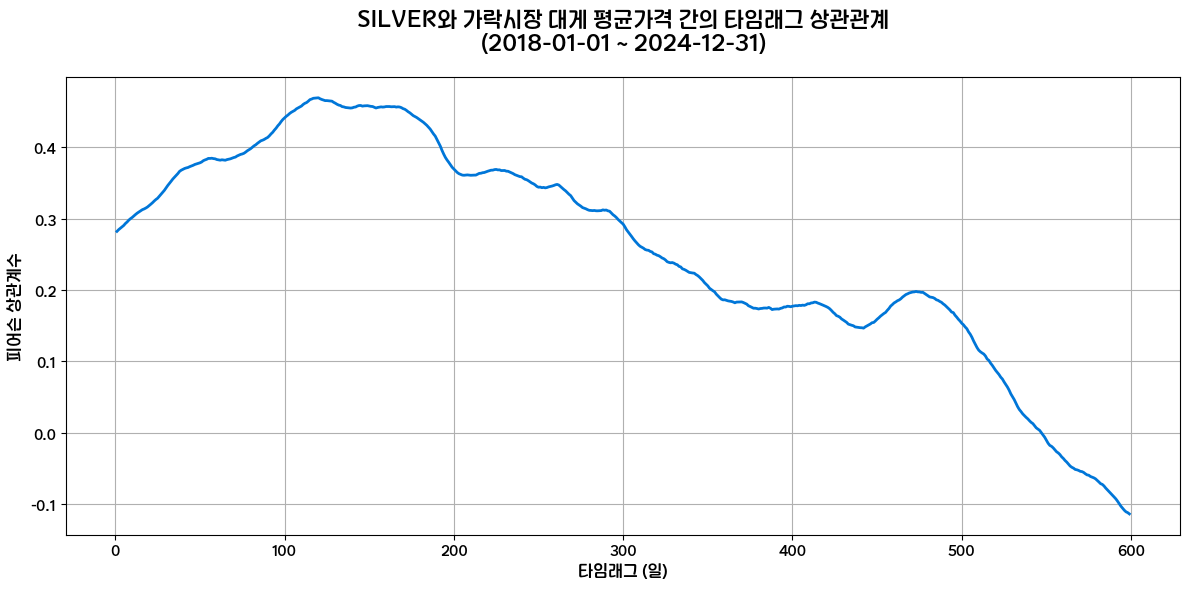

SILVER와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 120일 입니다.
최대 피어슨 상관계수: 0.4696
P-값: 1.9837e-88


In [21]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    silver_lagged = df_merged['Silver'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        silver_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'SILVER와 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('silver_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'SILVER와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-7 대게_가락 ~ MOVE

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.3153  | 6.1125e-41 |


     타임래그(일)  피어슨 상관계수           P-값
0          1  0.315311  6.112539e-41
1          2  0.311306  7.085801e-40
2          3  0.306722  1.106656e-38
3          4  0.301883  1.900417e-37
4          5  0.296994  3.174864e-36
..       ...       ...           ...
594      595 -0.077612  9.271245e-03
595      596 -0.072543  1.508094e-02
596      597 -0.068314  2.217496e-02
597      598 -0.067378  2.413599e-02
598      599 -0.066398  2.634462e-02

[599 rows x 3 columns]


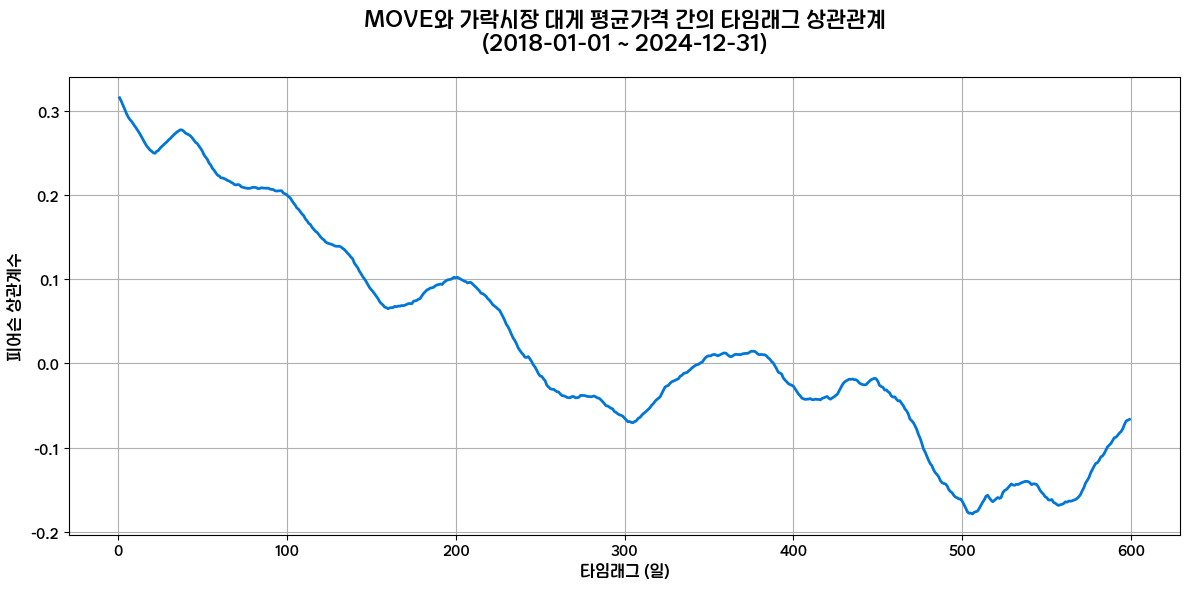

MOVE와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.3153
P-값: 6.1125e-41


In [17]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('pp/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    move_lagged = df_merged['MOVE'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        move_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'MOVE와 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('move_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'MOVE와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-8 대게_가락 ~ 한국은행 기준금리

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7958  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.111356  1.655229e-08
1          2  0.110533  2.124144e-08
2          3  0.109776  2.669179e-08
3          4  0.109008  3.358266e-08
4          5  0.108230  4.231209e-08
..       ...       ...           ...
594      595 -0.287969  8.919075e-39
595      596 -0.286908  1.792907e-38
596      597 -0.286481  2.434925e-38
597      598 -0.285909  3.610687e-38
598      599 -0.284955  6.752305e-38

[599 rows x 3 columns]


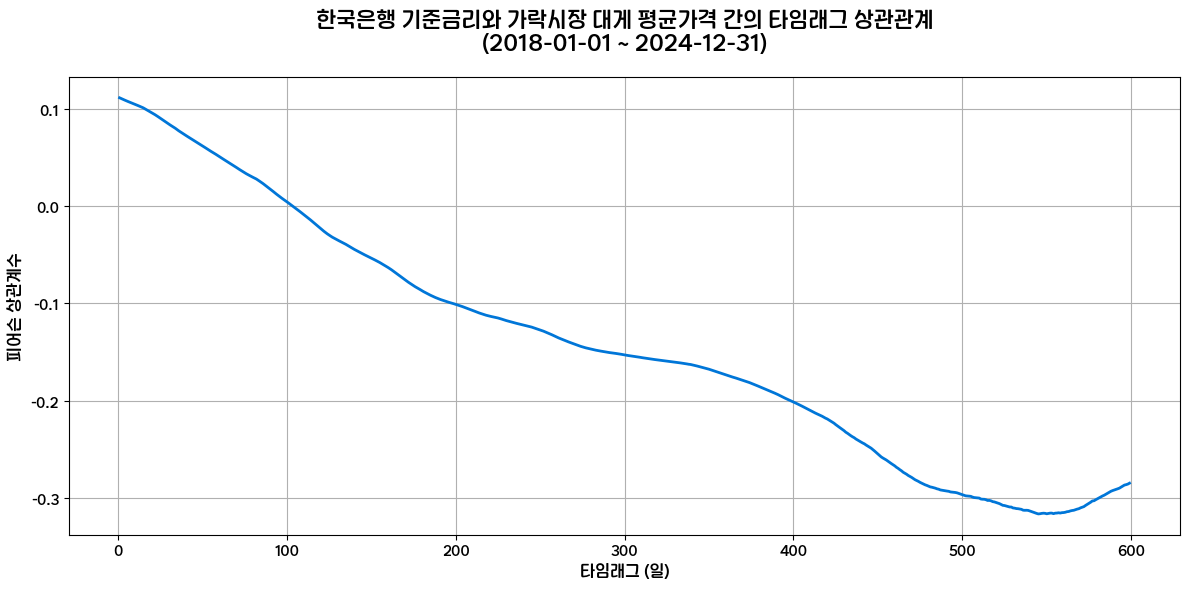

한국은행 기준금리와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.1114
P-값: 1.6552e-08


In [18]:
# 경제지표 데이터 로드
df_kr_rate = pd.read_csv('pp/d한국은행 기준금리_일자별.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('pp/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 대게 데이터 필터링 (가락시장)
df_crab = df_price[
    (df_price['item'] == '대게') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_crab, df_kr_rate, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kr_rate_lagged = df_merged['한국은행_기준금리'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kr_rate_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'한국은행 기준금리와 가락시장 대게 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('kr_rate_crab_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'한국은행 기준금리와 가락시장 대게 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')